<a href="https://colab.research.google.com/github/AlfAnalyst/study-projects-data-science-and-analysis/blob/main/%22%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B1%D0%B0%D0%B7%D1%8B_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80_%D0%B8_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%BC%D0%B5%D0%B6%D0%B4%D1%83_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B0%D0%BC%D0%B8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Задача:

1. Взять базу квартир (moscow_parsed_simple.csv). 
2. Провести дополнительную обработку данных. 
3. Перевести все параметры в числовой формат и рассчитайте корреляцию. 
4. Написать выводы.


In [2]:
%matplotlib inline

import seaborn as sns                    # Библиотека для визуализации данных.
import pandas as pd                      # Библиотека для работы с датафреймом.
from tensorflow.keras import utils       # Для категорий. 
import numpy as np                       # Библиотека для работы с массивами.
import matplotlib.pyplot as plt          # Библиотека для визуализации данных.

import re                                # Регулряные выражения для эффективной работы со строками.

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_mos = pd.read_csv('/content/drive/MyDrive/Базы/moscow_parsed_simple.csv')
df_mos.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции
0,0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0
1,1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0
2,2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0
3,3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0
4,4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0
5,5,1,Шелепиха м.,15п,9/36 К,NaN,NaN,44/14.7/19.2,12700000.0,NaN,NaN,25.07.2019,11.0
6,6,1,Улица Дмитриевского м.,2п,7/16 П,Л,Р,43/20/8,6500000.0,NaN,NaN,25.07.2019,14.0
7,7,1,Бульвар Рокоссовского м.,2п,2/5 К,Б,С,31/17/6,6000000.0,NaN,NaN,25.07.2019,15.0
8,8,1,Марьина Роща м.,10п,7/14 П,2Б,NaN,38.9/20.9/8.5,8900000.0,NaN,NaN,25.07.2019,16.0
9,9,1,Марьино м.,20п,10/24 М-К,NaN,-,30.9/17.9/10,5999984.0,NaN,NaN,25.07.2019,16.0


In [ ]:
df_mos.shape

(126268, 13)

In [ ]:
print('Пустые значения по столбцам:')
df_mos.isna().sum() #Проверяем пропуски в базе.

Пустые значения по столбцам:


Unnamed: 0                       0
Комнат                           6
Метро / ЖД станции             334
От станции                    1729
Дом                              0
Балкон                       78199
Санузел                      46709
Площадь                          0
Цена, руб.                       0
ГРМ                         124160
Бонус агенту                125016
Дата                             0
Кол-во дней в экспозиции        37
dtype: int64

In [ ]:
df_mos.drop(['ГРМ', 'Бонус агенту', 'Unnamed: 0', 'Кол-во дней в экспозиции'], axis=1, inplace=True) # Удаляем столбцы:"ГРМ","Бонус агенту",'Кол-во дней в экспозиции' и "Unnamed".
df_mos.head()

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Дата
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,25.07.2019
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,25.07.2019
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,25.07.2019
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,25.07.2019
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,25.07.2019


In [ ]:
df_mos1 = df_mos.copy()
df_mos1.index = pd.to_datetime(df_mos1.Дата) # Преобразуем столбец "Дата" в столбец индексов.
df_mos1.drop('Дата', axis=1, inplace=True) # Удаляем исходный столбец "Дата".
df_mos1.head()

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб."
Дата,,,,,,,,
2019-07-25,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0
2019-07-25,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0
2019-07-25,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0
2019-07-25,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0
2019-07-25,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0


In [ ]:
df_mos1.Балкон = df_mos1['Балкон'].fillna('Отсутствует') #  Заменяем осмысленными значениями все пропуски.
df_mos1.Санузел = df_mos1['Санузел'].fillna('не указано')
df_mos1['Метро / ЖД станции'] = df_mos1['Метро / ЖД станции'].fillna('не указано')
df_mos1['От станции'] = df_mos1['От станции'].fillna('не указано')
df_mos1

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб."
Дата,,,,,,,,
2019-07-25,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0
2019-07-25,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0
2019-07-25,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0
2019-07-25,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0
2019-07-25,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0
...,...,...,...,...,...,...,...,...
2019-12-07,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,не указано,19.8/?/?,2850000.0
2019-07-23,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0
2019-12-07,Ст,Коломенская м.,15п,1/9 П,Отсутствует,не указано,15.4/13.2/?,2900000.0


In [ ]:
df_mos1['Комнат'].unique() # Посмотрим на значения в столбце "Комнат"

array([1.0, nan, 2.0, '2', '5', '6', '7', '8', '10', '9', '14', '13',
       '11', '15', '16', '12', '20', '30', '01.мар', '02.апр', '01.апр',
       '01.янв', '03.май', '01.фев', '02.мар', '01.июн', '01.авг',
       '03.апр', '01.май', '02.май', '01.сен', '01.июл', '02.июл',
       '03.июн', '05.июн', '03.авг', '01.окт', '04.май', '02.июн',
       '04.июн', '01.дек', '1', '4', '03.июл', '02.фев', '03.мар', 'Ст'],
      dtype=object)

In [ ]:
def getParameteRoom(arg): # Функция будет очищать столбец "Комнат" от выбросов.
  sarg = str(arg)
  num = '623451' # Будем учитывать квартиры не больше шестикомнатных.
  if 'Ст' in sarg: # Будем считать, что студия - это однокомнатная квартира.
    sarg = 1
    return int(sarg)
  if sarg in num :
    return int(sarg)
  if arg == 1.0:
    sarg = 1
    return int(sarg)
  if arg == 2.0:
    sarg = 2
    return int(sarg)
  else:
    return 'нет данных'

In [ ]:
df_mos1['Комнат'] = df_mos1['Комнат'].apply(getParameteRoom) # Применяем функцию для заполнения нового столбца "Комнат".
df_mos1['Комнат'].unique()

array([1, 'нет данных', 2, 5, 6, 4], dtype=object)

In [ ]:
def question_mark(arg): # Функция будет удалять значки "?".
  sarg = str(arg)
  if '?' in sarg:
    sarg = sarg.replace('?', '')
    return sarg
  else:
    return arg

In [ ]:
df_mos2 = df_mos1.copy()
df_mos2['От станции'] = df_mos1['От станции'].apply(question_mark) # Применяем функцию удаления всех знаков ? в столбцах.
df_mos2['Дом'] = df_mos1['Дом'].apply(question_mark) # Применяем функцию удаления всех знаков ? в столбцах.
df_mos2

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб."
Дата,,,,,,,,
2019-07-25,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0
2019-07-25,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0
2019-07-25,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0
2019-07-25,1,Шаболовская м.,12п,8/12,Б,Р,38/15/7,11200000.0
2019-07-25,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0
...,...,...,...,...,...,...,...,...
2019-12-07,1,Некрасовка м.,4п,2/17 П,Отсутствует,не указано,19.8/?/?,2850000.0
2019-07-23,1,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0
2019-12-07,1,Коломенская м.,15п,1/9 П,Отсутствует,не указано,15.4/13.2/?,2900000.0


In [ ]:
# Функция будет заполнять столбец "От станции".
def getParameterPath(arg):
  arg = str(arg)
  if 'п' in arg: 
    arg = arg.replace('п', ' минут пешком')
    return arg 
  if 'т' in arg: 
    arg = arg.replace('т', ' минут транспортом')
    return arg
  if 'не указано' in arg:
    #arg = re.sub(r'[\d]','', arg) # Заменяем все, что не цифры на отсутствие символов. 
    arg = '60 минут транспортом' # Непонятные символы заменяем на далекий путь до станции.
    return arg 

In [ ]:
df_mos2['От станции'] = df_mos1['От станции'].apply(getParameterPath) # Применяем функцию для заполнения "минут пешком" или "минут транспортом".
df_mos2

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб."
Дата,,,,,,,,
2019-07-25,1,Шелепиха м.,12 минут пешком,35/37 М,Отсутствует,2,64.1/23/20,19500000.0
2019-07-25,1,Пятницкое шоссе м.,30 минут транспортом,11/14 П,Л,Р,38.4/17/9,4800000.0
2019-07-25,1,Планерная м.,5 минут транспортом,11/22 П,Б,С,38.2/19.9/9.9,7990000.0
2019-07-25,1,Шаболовская м.,12 минут пешком,8/12,Б,Р,38/15/7,11200000.0
2019-07-25,1,Бабушкинская м.,15 минут пешком,4/14 П,Отсутствует,С,34/17/8,6250000.0
...,...,...,...,...,...,...,...,...
2019-12-07,1,Некрасовка м.,4 минут пешком,2/17 П,Отсутствует,не указано,19.8/?/?,2850000.0
2019-07-23,1,Авиамоторная м.,6 минут пешком,2/8 К,Отсутствует,С,20.4/18/?,3839990.0
2019-12-07,1,Коломенская м.,15 минут пешком,1/9 П,Отсутствует,не указано,15.4/13.2/?,2900000.0


In [ ]:
df_mos2['Дом'].unique() # Смотрим на содержимое столбца "Дом".

array(['35/37 М', '11/14 П', '11/22 П', ..., '54/65 М', '3/53 М-К',
       '52/73 П'], dtype=object)

In [ ]:
def getParameterFloor(arg): # Функция, которая будет заполнять числовыми значениями столбец "Этаж".
  num = re.sub(r'[^\d/]','', arg) # Заменяем все, что не цифры и не "/" на отсутствие символов.
  return num

In [ ]:
def getParameterType(arg): # Функция, которая будет изменять значения в столбце "Дом".
  sarg = str(arg)
  sarg = re.sub(r'[\d/]','', arg) # Заменяем все цифры и "/" на отсутствие символов.
  if 'М' in arg and 'М-' not in arg: 
    sarg = sarg.replace('М', 'монолитный')
    return sarg 
  if 'П' in sarg: 
    sarg = sarg.replace('П', 'панельный')
    return sarg
  if 'К' in arg and '-К' not in arg:  
    sarg = sarg.replace('К', 'кирпичный')       
    return sarg
  if 'М-К' in arg: 
    sarg = sarg.replace('М-К', 'монолитно-кирпичный')       
    return sarg
  else:
    sarg = 'не указано'
    return sarg

In [ ]:
df_mos3 = df_mos2.copy()
df_mos3['Этаж'] = df_mos2['Дом'] # Добавляем столбец "Этаж" с данными из столбца "Дом".
df_mos3['Этаж'] = df_mos3['Этаж'].apply(getParameterFloor) # Применяем функцию для заполнения нового столбца "Этаж".
df_mos3['Дом'] = df_mos2['Дом'].apply(getParameterType) # Применяем функцию для заполнения столбца "Дом".
df_mos3

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Этаж
Дата,,,,,,,,,
2019-07-25,1,Шелепиха м.,12 минут пешком,монолитный,Отсутствует,2,64.1/23/20,19500000.0,35/37
2019-07-25,1,Пятницкое шоссе м.,30 минут транспортом,панельный,Л,Р,38.4/17/9,4800000.0,11/14
2019-07-25,1,Планерная м.,5 минут транспортом,панельный,Б,С,38.2/19.9/9.9,7990000.0,11/22
2019-07-25,1,Шаболовская м.,12 минут пешком,не указано,Б,Р,38/15/7,11200000.0,8/12
2019-07-25,1,Бабушкинская м.,15 минут пешком,панельный,Отсутствует,С,34/17/8,6250000.0,4/14
...,...,...,...,...,...,...,...,...,...
2019-12-07,1,Некрасовка м.,4 минут пешком,панельный,Отсутствует,не указано,19.8/?/?,2850000.0,2/17
2019-07-23,1,Авиамоторная м.,6 минут пешком,кирпичный,Отсутствует,С,20.4/18/?,3839990.0,2/8
2019-12-07,1,Коломенская м.,15 минут пешком,панельный,Отсутствует,не указано,15.4/13.2/?,2900000.0,1/9


In [ ]:
df_mos3 = df_mos3.rename(columns={'Цена, руб.':'Цена (млн.руб.)'}) # Меняем названия столбца.
df_mos3['Цена (млн.руб.)'] = round(df_mos2['Цена, руб.'] / 1000000, 2) # Переводим значения в млн.руб.
df_mos3.tail(10)

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,Цена (млн.руб.),Этаж
Дата,,,,,,,,,
2019-07-25,1,Комсомольская м.,11 минут пешком,кирпичный,Отсутствует,С,23.5/?/?,5.29,1/3
2019-07-23,1,Алтуфьево м.,27 минут транспортом,не указано,Л,С,26/10.9/?,5.20,4/9
2019-07-23,1,Царицыно м.,3 минут транспортом,панельный,Отсутствует,С,14.8/12.3/?,2.64,1/9
2019-07-24,1,Волжская м.,13 минут пешком,кирпичный,Отсутствует,С,20.6/?/?,3.29,1/5
2019-07-24,1,Волжская м.,13 минут пешком,кирпичный,Отсутствует,Р,20.6/?/?,3.29,1/5
2019-12-07,1,Некрасовка м.,4 минут пешком,панельный,Отсутствует,не указано,19.8/?/?,2.85,2/17
2019-07-23,1,Авиамоторная м.,6 минут пешком,кирпичный,Отсутствует,С,20.4/18/?,3.84,2/8
2019-12-07,1,Коломенская м.,15 минут пешком,панельный,Отсутствует,не указано,15.4/13.2/?,2.90,1/9
2019-07-22,1,Алтуфьево м.,5 минут транспортом,монолитный,Отсутствует,не указано,26/10.9/7,5.20,4/9


In [ ]:
# Функция будет обрабатывать столбец "Площадь".
def getParameterArea(arg):
  arg = re.sub(r'\d{2}.\d{2}.\d{4}', '1', arg) # Все выбросы в виде даты заменяем на 1.
  arg = re.split(r'/', arg)
  arg = arg[0] # Берем только первый элемент, где содержится информация об общей площади.
  if '?' in arg:
    arg = 1
  return arg

In [ ]:
df_mos4 = df_mos3.copy()
df_mos4['Площадь'] = df_mos3['Площадь'].apply(getParameterArea) # Применяем функцию для заполнения нового столбца "Площадь".
df_mos4

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,Цена (млн.руб.),Этаж
Дата,,,,,,,,,
2019-07-25,1,Шелепиха м.,12 минут пешком,монолитный,Отсутствует,2,64.1,19.50,35/37
2019-07-25,1,Пятницкое шоссе м.,30 минут транспортом,панельный,Л,Р,38.4,4.80,11/14
2019-07-25,1,Планерная м.,5 минут транспортом,панельный,Б,С,38.2,7.99,11/22
2019-07-25,1,Шаболовская м.,12 минут пешком,не указано,Б,Р,38,11.20,8/12
2019-07-25,1,Бабушкинская м.,15 минут пешком,панельный,Отсутствует,С,34,6.25,4/14
...,...,...,...,...,...,...,...,...,...
2019-12-07,1,Некрасовка м.,4 минут пешком,панельный,Отсутствует,не указано,19.8,2.85,2/17
2019-07-23,1,Авиамоторная м.,6 минут пешком,кирпичный,Отсутствует,С,20.4,3.84,2/8
2019-12-07,1,Коломенская м.,15 минут пешком,панельный,Отсутствует,не указано,15.4,2.90,1/9


In [ ]:
df_mos4['Площадь'].unique() # Проверяем содержание нового столбца "Площадь".

array(['64.1', '38.4', '38.2', ..., '199.2', '11.9', '180.8'],
      dtype=object)

In [ ]:
df_mos4.to_csv('/content/drive/My Drive/Базы/mos_UPro2_parsed.csv', index=False)  # Сохраняем новую базу после парсинга.

In [ ]:
df_mos4.tail()

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,Цена (млн.руб.),Этаж
Дата,,,,,,,,,
2019-12-07,1,Некрасовка м.,4 минут пешком,панельный,Отсутствует,не указано,19.8,2.85,2/17
2019-07-23,1,Авиамоторная м.,6 минут пешком,кирпичный,Отсутствует,С,20.4,3.84,2/8
2019-12-07,1,Коломенская м.,15 минут пешком,панельный,Отсутствует,не указано,15.4,2.90,1/9
2019-07-22,1,Алтуфьево м.,5 минут транспортом,монолитный,Отсутствует,не указано,26,5.20,4/9
2019-07-25,1,Волжская м.,10 минут пешком,кирпичный,Отсутствует,не указано,17.5,2.79,1/5


Кодируем базу для подсчета корреляций.

In [ ]:
# Столбец "Комнат".
def roomPar(arg):
  out = 0 # Индекс для "не указано".
  
  if (arg == 1): # Для однокомнатной квартиры.
    out = 1
  elif (arg == 2):
    out = 2
  elif (arg == 4): # Для четырехкомнатной квартиры (трехкомнатных в базе почему-то не было).
    out = 3
  elif (arg == 5):
    out = 4
  elif (arg == 6):
    out = 5

  return list(utils.to_categorical(out, 6).astype('int')) #Вектор категорий количества комнат.

In [ ]:
# Столбец "От станции".
def pathPar(arg):
  out = 0
  arg = re.split(r' ', arg)
  min = int(arg[0])
  if min >= 1: # Более 1 минуты.
    out = 1
  if min > 5:
    out = 2
  if min > 10: 
    out = 3
  if min > 15:
    out = 4
  if min > 20:
    out = 5
  if min > 25:
    out = 6
  if min > 30:
    out = 7

  return list(utils.to_categorical(out, 8).astype('int')) #Вектор категорий времени в пути от станции.

In [ ]:
# Столбец "Дом".
def typePar(arg):
  out = 0 # Индекс для "не указано".
  if 'монолитный' in arg:          
    out = 1
  if 'панельный' in arg: 
    out = 2
  if 'кирпичный' in arg:     
    out = 3
  if 'монолитно' in arg:     
    out = 4

  return list(utils.to_categorical(out, 5).astype('int')) #Вектор категорий типов домов.

Столбцы "Балкон" и "Санузел" пропускаем, слишком мала вероятность, что эти параметры будут решающими при выборе квартиры.

In [ ]:
# Столбец "Площадь".
def areaPar(arg):
  #print(arg, type(arg))
  arg = float(arg)
  out = 0 # Индекс для значений по умолчанию.
  if arg > 20: # Площадь более 20.
    out = 1
  if arg > 40:
    out = 2
  if arg > 60: 
    out = 3
  if arg > 80: 
    out = 4  
  if arg > 100:
    out = 5
  if arg > 200:
    out = 6
  if arg > 500:
    out = 7
  
  return list(utils.to_categorical(out, 8).astype('int')) #Вектор категорий площади.

In [ ]:
# Извлекаем все параметры
def Parameters(val):
  room0 = roomPar(val[0])                           # Параметры комнат, номер столбца 0.
  path2 = pathPar(val[2])                           # Параметры пути от станции, номер столбца 2.
  type3 = typePar(val[3])                           # Параметры типа дома, номер столбца 3.
  area6 = areaPar(val[6])                           # Параметры площади, номер столбца 6.
  out = [] 
  # Склеиваем все параметры в вектор  
  out += room0
  out += path2
  out += type3
  out += area6
  return out

In [ ]:
def get4Data(values):
  vals = [] # Здесь будем хранить кодированные значения.
  costs = [] # Здесь будем хранить данные о цене квартир.
  
  for val in values:
    y = val[7] # Цена квартиры.
    
    x = Parameters(val)
    vals.append(x)
    costs.append(y) 
  
  vals = np.array(vals)
  costs = np.array(costs)
  
  return (vals, costs)

In [ ]:
vals, costs = get4Data(df_mos4.values) # .values - значения базы, извлекаем их

In [ ]:
categorical = pd.DataFrame(
    {'Комнат': [np.argmax(i) for i in vals[:,0:6]],                                                                
     'От станции':[np.argmax(i) for i in vals[:,6:14]],
     'Дом':[np.argmax(i) for i in vals[:,14:19]],
     'Площадь':[np.argmax(i) for i in vals[:,19:26]],
     'Цена (млн.руб.)':costs})

categorical.head(10) # основные статистические данные по базе

,Комнат,От станции,Дом,Площадь,Цена (млн.руб.)
0,1,3,1,3,19.50
1,1,6,2,1,4.80
2,1,1,2,1,7.99
3,1,3,0,1,11.20
4,1,3,2,1,6.25
5,1,3,3,2,12.70
6,1,1,2,2,6.50
7,1,1,3,1,6.00
8,1,2,2,1,8.90
9,1,4,4,1,6.00


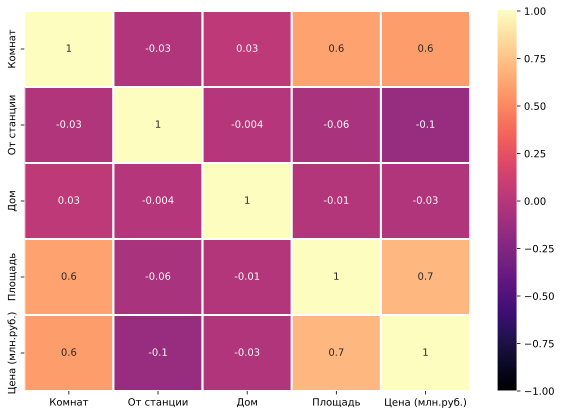

In [ ]:
rcParams['figure.figsize'] = 10, 7 # Размер графиков.
corr_matrix = categorical.corr('spearman') # Используем матрицу корреляции Спирмена.
sns.heatmap(corr_matrix, cmap= 'magma', vmin=-1, center=0, linewidths=2, linecolor='white', annot = True, fmt='.1g')  

Корреляция есть между площадью квартиры и ее ценой, а так же между ценой и количеством комнат. Тип дома и время в пути от станции на стоимость квартиры не влияют.
(Конечно, еще есть зависимость между площадью квартиры и количеством комнат. Но это очевидно.)
Вывод. На цену квартиры влияет площадь: чем выше площадь квартиры, тем выше ее цена.